# Import necessary libraries #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

DATASET = os.path.join('dataset', 'train.csv') 

# Data Inspection & Cleaning #

In [2]:
df = pd.read_csv(DATASET)
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Given that this is a Kaggle provided dataset, it has already been labeled appropiately. Considering the description of the columns provided in [dataset/data_description.txt](dataset/data_description.txt), it is important to note that `NaN` values are important. They are required feature values for some of the houses. Therefore, `NaN` values will not  be discarded.

The column to predict is the `SalesPrice` column.

### We don't need the `Id` column ###

In [3]:
df = df.drop('Id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Convert `NaN` values certain columns to string/object values ###

Specific columns will have their `NaN` values. These will be converted to `NA` string values so they are not omitted from the info. `NaN` values are important in these columns.

In [4]:
nan_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
               'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in df.columns:
    if col in nan_columns:
        df[col].replace({np.nan: 'NA'}, inplace=True)
        
df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

We can see that there are still some missing values in some columns. Specifically, `LotFrontage`, `MasVnrType` and `MasVnrArea`. From the description file, it's obvious there's a relationship between `MasVnrType` and `MasVnrArea`. `MasVnrType` has five categories and `NaN` is not a valid category. Entries with `NaN` values in `MasVnrType` have correspondng `NaN` values in `MasVnrType`. These rows will be removed.

In [6]:
# Examples of records with NaN values that need to be removed
MasVnrType = df['MasVnrType'][234]
print(MasVnrType)

MasVnrArea = df['MasVnrArea'][234]
print(MasVnrArea)

nan
nan


`LotFrontage` is defined as "Linear feet of street connected to property". `NaN` values indicate that no values for these properties were provided. We will assume that `NaN` values equate to 0.

In [7]:
# Remove Nan row from MasVnrType and MasVnrArea
df.dropna(subset=['MasVnrType', 'MasVnrArea'], inplace=True)

# Replace Nan row for LotFrontage with 0
df['LotFrontage'].replace({np.nan: 0}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1452 non-null int64
MSZoning         1452 non-null object
LotFrontage      1452 non-null float64
LotArea          1452 non-null int64
Street           1452 non-null object
Alley            1452 non-null object
LotShape         1452 non-null object
LandContour      1452 non-null object
Utilities        1452 non-null object
LotConfig        1452 non-null object
LandSlope        1452 non-null object
Neighborhood     1452 non-null object
Condition1       1452 non-null object
Condition2       1452 non-null object
BldgType         1452 non-null object
HouseStyle       1452 non-null object
OverallQual      1452 non-null int64
OverallCond      1452 non-null int64
YearBuilt        1452 non-null int64
YearRemodAdd     1452 non-null int64
RoofStyle        1452 non-null object
RoofMatl         1452 non-null object
Exterior1st      1452 non-null object
Exterior2nd      1452 no

In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,56.949036,57.634986,10507.276171,6.092975,5.579201,1971.116391,1984.775482,103.685262,441.970386,46.805785,...,94.416667,46.390496,21.937328,3.428375,15.143939,2.774105,43.728650,6.318182,2007.815427,180615.063361
std,42.340097,34.646214,9989.563592,1.381289,1.113136,30.193761,20.652466,181.066207,455.360279,161.726239,...,125.393706,66.048619,61.089879,29.396943,55.899665,40.287389,497.478278,2.699644,1.328927,79285.541485
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.000000,7538.750000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,706.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


To give us an idea of the nature of values of features, we can plot histograms of numeric features.

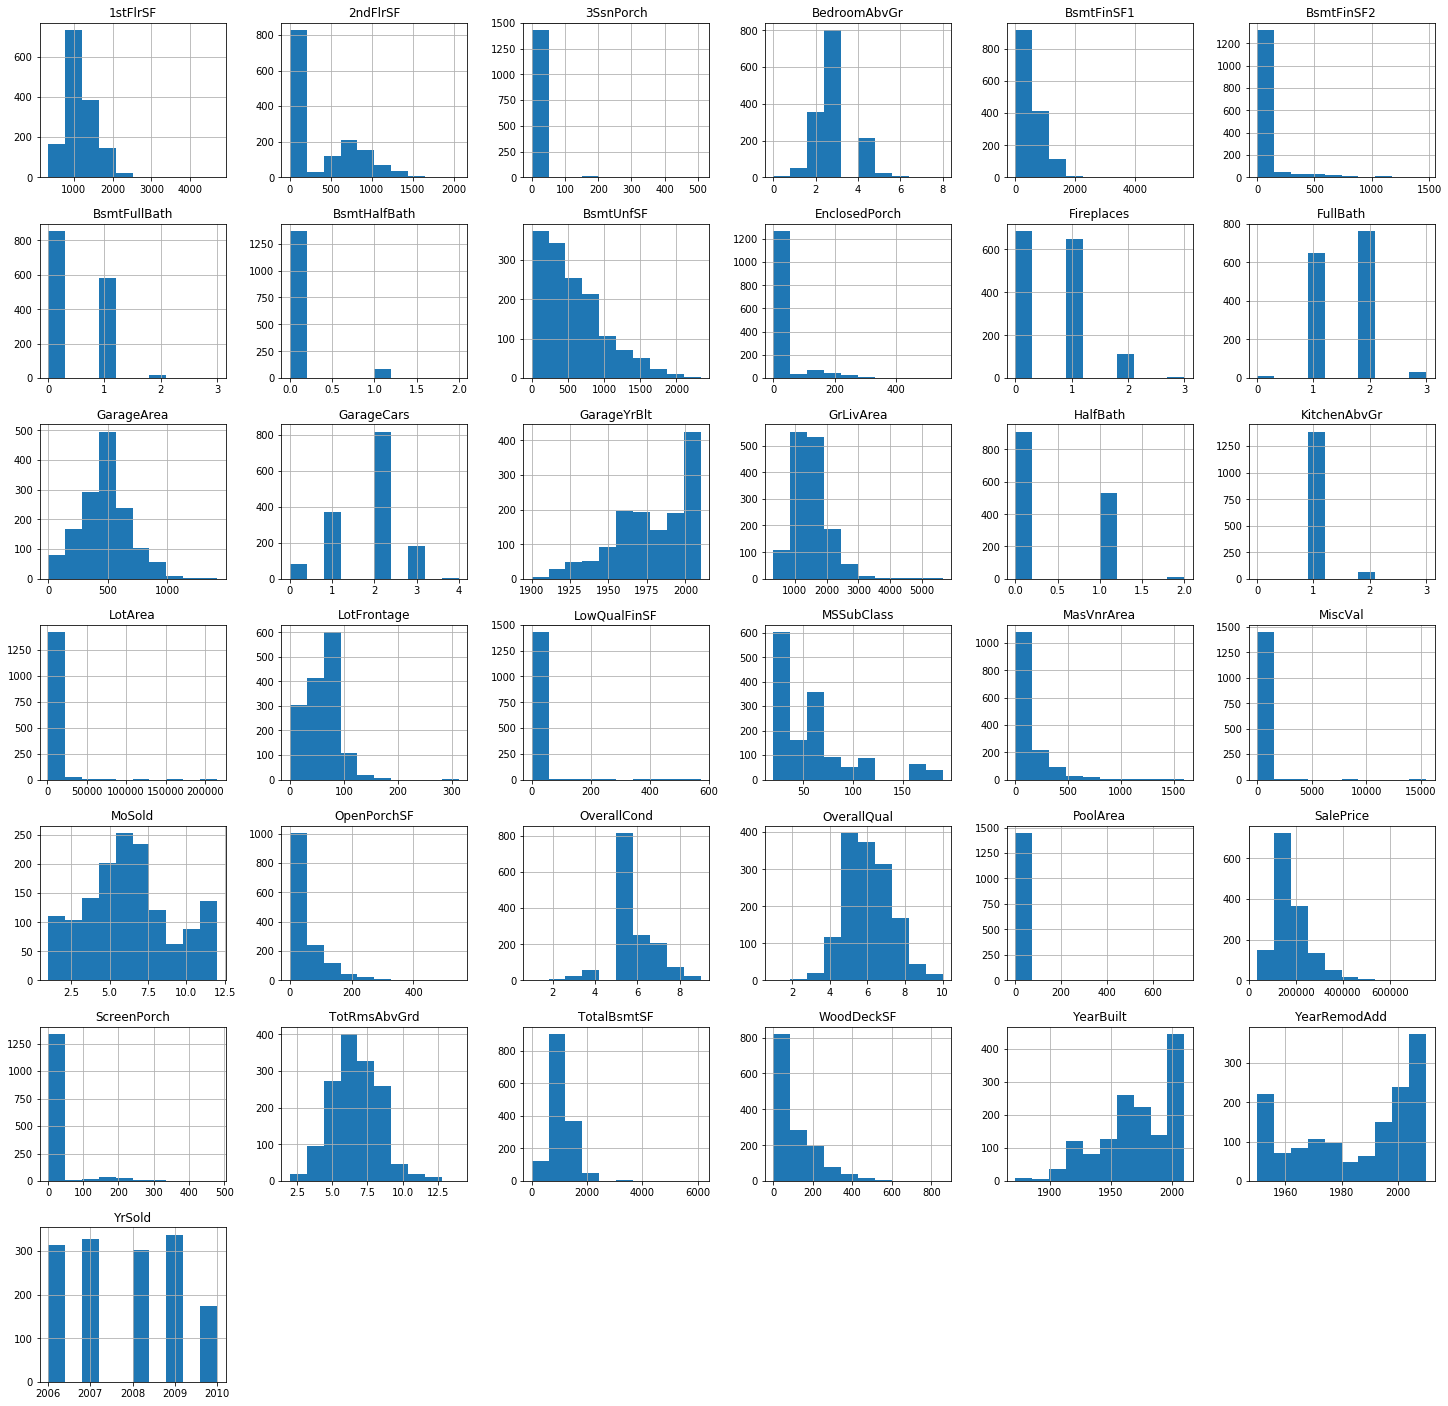

In [9]:
df.hist(bins=10, figsize=(25, 25))
plt.show()

### Normalization/Feature Scaling ###

From the histograms plotted above, we can see that the units of the features vary widely. The model might find learning and prediction confusing with this distribution. It will benefit the model if the dataset is normalized/scaled. We will use the `MinMaxScaler` in `scikit-learn` to scale our features.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = df.reset_index(drop=True)  # reset index after dropping columns to align with d
d = df.copy()
d = d.select_dtypes(include=['int64', 'float64'])

# We don't need to scale these features
d = d.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold', 'MiscVal', 'SalePrice'], axis=1)  

columns = d.columns
print(columns)

d = scaler.fit_transform(d)
print(d.shape)

d = pd.DataFrame(d, columns=columns)

for c in columns:
    df[c] = d[c]

print(df.shape)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'],
      dtype='object')
(1452, 30)
(1452, 80)


# Exploratory Data Analysis #

Find correlations within the data.

In [11]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789997
GrLivArea        0.710080
GarageCars       0.639686
GarageArea       0.622492
TotalBsmtSF      0.612971
1stFlrSF         0.606849
FullBath         0.562491
TotRmsAbvGrd     0.536311
YearBuilt        0.522896
YearRemodAdd     0.507158
GarageYrBlt      0.486220
MasVnrArea       0.477493
Fireplaces       0.468930
BsmtFinSF1       0.383977
WoodDeckSF       0.324650
2ndFlrSF         0.322710
OpenPorchSF      0.311268
HalfBath         0.282040
LotArea          0.264674
BsmtFullBath     0.225027
BsmtUnfSF        0.215740
LotFrontage      0.208386
BedroomAbvGr     0.171934
ScreenPorch      0.113044
PoolArea         0.093109
3SsnPorch        0.045247
MoSold           0.045136
BsmtFinSF2      -0.010316
BsmtHalfBath    -0.015993
MiscVal         -0.020951
LowQualFinSF    -0.025263
YrSold          -0.026180
OverallCond     -0.076294
MSSubClass      -0.082813
EnclosedPorch   -0.128778
KitchenAbvGr    -0.137419
Name: SalePrice, dtype: float64

In [12]:
df.corr()['GarageCars'].sort_values(ascending=False)

GarageCars       1.000000
GarageArea       0.882332
SalePrice        0.639686
OverallQual      0.599734
GarageYrBlt      0.589016
YearBuilt        0.537492
FullBath         0.470008
GrLivArea        0.467149
1stFlrSF         0.439550
TotalBsmtSF      0.433601
YearRemodAdd     0.419815
MasVnrArea       0.364204
TotRmsAbvGrd     0.363174
Fireplaces       0.301632
WoodDeckSF       0.226669
BsmtFinSF1       0.222241
HalfBath         0.218172
BsmtUnfSF        0.214535
OpenPorchSF      0.211257
2ndFlrSF         0.185412
LotFrontage      0.164758
LotArea          0.154739
BsmtFullBath     0.130329
BedroomAbvGr     0.087773
ScreenPorch      0.051277
MoSold           0.039393
3SsnPorch        0.036116
PoolArea         0.021140
BsmtHalfBath    -0.020282
BsmtFinSF2      -0.037554
YrSold          -0.038065
MSSubClass      -0.039043
MiscVal         -0.042900
KitchenAbvGr    -0.051450
LowQualFinSF    -0.094276
EnclosedPorch   -0.151857
OverallCond     -0.184866
Name: GarageCars, dtype: float64

We can see that `GarageCars` and `GarageArea` are highly positively correlated. `GarageCars` is the size of a garage in car capacity while `GarageArea` is the size of garage in square feet. Both features can be combined to one feature - cars per square feet.

In [13]:
df['GarageCarsPerGarageArea'] = df['GarageCars']/df['GarageArea']
df['GarageCarsPerGarageArea'].replace({np.nan: 0}, inplace=True)
df.drop(['GarageCars', 'GarageArea'], axis=1, inplace=True)  # We don't need these columns anymore
df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageCarsPerGarageArea
0,0.235294,RL,0.207668,0.033420,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,NA,0,2,2008,WD,Normal,208500,1.293796
1,0.000000,RL,0.255591,0.038795,Pave,NA,Reg,Lvl,AllPub,FR2,...,NA,NA,NA,0,5,2007,WD,Normal,181500,1.541304
2,0.235294,RL,0.217252,0.046507,Pave,NA,IR1,Lvl,AllPub,Inside,...,NA,NA,NA,0,9,2008,WD,Normal,223500,1.166118
3,0.294118,RL,0.191693,0.038561,Pave,NA,IR1,Lvl,AllPub,Corner,...,NA,NA,NA,0,2,2006,WD,Abnorml,140000,1.656542
4,0.235294,RL,0.268371,0.060576,Pave,NA,IR1,Lvl,AllPub,FR2,...,NA,NA,NA,0,12,2008,WD,Normal,250000,1.272129
5,0.176471,RL,0.271565,0.059899,Pave,NA,IR1,Lvl,AllPub,Inside,...,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000,1.477083
6,0.000000,RL,0.239617,0.041057,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,NA,0,8,2007,WD,Normal,307000,1.114780
7,0.235294,RL,0.000000,0.042450,Pave,NA,IR1,Lvl,AllPub,Corner,...,NA,NA,Shed,350,11,2009,WD,Normal,200000,1.464876
8,0.176471,RM,0.162939,0.022529,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,NA,0,4,2008,WD,Abnorml,129900,1.514957
9,1.000000,RL,0.159744,0.028605,Pave,NA,Reg,Lvl,AllPub,Corner,...,NA,NA,NA,0,1,2008,WD,Normal,118000,1.729268


# One-Hot Encode Data #

Categorical data cannot be use in its default data type if the data type is not an integer or floating point value. Categorial data in string must be encoded to values that the model can learn from.

In [14]:
# One-Hot encode Street column
df['Street'].replace(to_replace=['Grvl', 'Pave'], value=[0, 1], inplace=True)

# One-Hot encode CentralAir
df['CentralAir'].replace(to_replace=['N', 'Y'], value=[0, 1], inplace=True)

In [15]:
data = df.copy()
targets = data['SalePrice']
features = data.drop('SalePrice', axis=1, inplace=True)

# One-Hot encode other categorical variables
features = pd.get_dummies(data)
features_df = features
features_columns = features_df.columns
features.head(20)

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.207668,0.033420,1,0.666667,0.500,2003,2003,0.12250,0.125089,...,0,0,0,1,0,0,0,0,1,0
1,0.000000,0.255591,0.038795,1,0.555556,0.875,1976,1976,0.00000,0.173281,...,0,0,0,1,0,0,0,0,1,0
2,0.235294,0.217252,0.046507,1,0.666667,0.500,2001,2002,0.10125,0.086109,...,0,0,0,1,0,0,0,0,1,0
3,0.294118,0.191693,0.038561,1,0.666667,0.500,1915,1970,0.00000,0.038271,...,0,0,0,1,1,0,0,0,0,0
4,0.235294,0.268371,0.060576,1,0.777778,0.500,2000,2000,0.21875,0.116052,...,0,0,0,1,0,0,0,0,1,0
5,0.176471,0.271565,0.059899,1,0.444444,0.500,1993,1995,0.00000,0.129695,...,0,0,0,1,0,0,0,0,1,0
6,0.000000,0.239617,0.041057,1,0.777778,0.500,2004,2005,0.11625,0.242558,...,0,0,0,1,0,0,0,0,1,0
7,0.235294,0.000000,0.042450,1,0.666667,0.625,1973,1973,0.15000,0.152197,...,0,0,0,1,0,0,0,0,1,0
8,0.176471,0.162939,0.022529,1,0.666667,0.500,1931,1950,0.00000,0.000000,...,0,0,0,1,1,0,0,0,0,0
9,1.000000,0.159744,0.028605,1,0.444444,0.625,1939,1950,0.00000,0.150780,...,0,0,0,1,0,0,0,0,1,0


`GarageYrBlt` has `NaN` values. We would expect that this feature might have some bearing on the final sale price. We have the option of removing values with `NaN` or imputing them with the median of the years.

For this experimentation, we will replace `NaN` values with the median of the years using `scikit-learn`'s imputer class.

In [16]:
from sklearn.preprocessing import Imputer

def imputer(df):
        imputer = Imputer(missing_values=np.nan, strategy='median')
        return imputer.fit_transform(df)

features = imputer(features)

# Establishing Baseline #

The baseline data is used to compare performance with the final model. First we have to split the data into training and testing sets. `scikit-learn` provides a method to do the splitting.

In [17]:
from sklearn.model_selection import train_test_split

# Split data in 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=.3, random_state=42)

print('Train features: {} \nTest features: {} \nTrain targets: {} \nTest targets: {}'.format(X_train.shape, X_test.shape, 
                                                                                             y_train.shape, y_test.shape))

Train features: (1016, 299) 
Test features: (436, 299) 
Train targets: (1016,) 
Test targets: (436,)


We will use the median value of the training targets to give us an estimation of a baseline outcome to compare our predictions.

In [18]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline = np.median(y_train)

print('Baseline guess is %0.2f' % baseline)
print('Baseline performance on test set is %0.2f' % mean_absolute_error(y_test, baseline))

Baseline guess is 163995.00
Baseline performance on test set is 56019.07


# Train Model #

## Compare different regressor algorithms ##

The following regressor algorithms will be compared using GridSearchCV
- Linear Regressor
- Random Forest Regressor
- Gradient Boosted Regressor
- Decision Tree Regressor

The data will be trained on the default values of each algorithm to see which most applies to the dataset.

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

random_state = 42
cv = KFold(n_splits=10, random_state=random_state)

def experimentation_scores(scores):
    mean = scores.mean()
    std = scores.std()
    return mean, std

c:\program files\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Decision Tree Regressor ###

In [20]:
model = DecisionTreeRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
decision_tree_mean, decision_tree_std = experimentation_scores(scores)

### Linear Regression ###

In [21]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
lg_mean, lg_std = experimentation_scores(scores)

### Gradient Boosting Regressor ###

In [22]:
model = GradientBoostingRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
gb_mean, gb_std = experimentation_scores(scores)

### Random Forest Regressor ###

In [23]:
model = RandomForestRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
rf_mean, rf_std = experimentation_scores(scores)

### Ada Boost Regressor ###

In [24]:
model = AdaBoostRegressor(random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
ab_mean, ab_std = experimentation_scores(scores)

A bar chart of the resulting performance of each algorithm will provide us with an idea of the best performing algorithm among the tested algorithms.

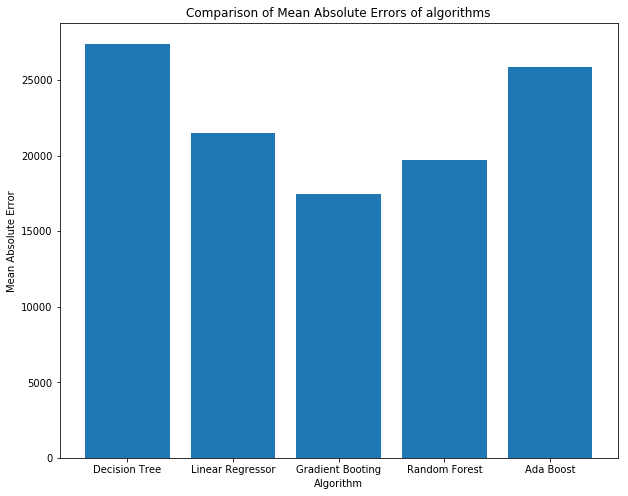

In [25]:
x = np.arange(5)
plt.figure(figsize=(10, 8))
plt.bar(x, [abs(decision_tree_mean), abs(lg_mean), abs(gb_mean), abs(rf_mean), abs(ab_mean)])
plt.xticks(x, ('Decision Tree', 'Linear Regressor', 'Gradient Booting', 'Random Forest', 'Ada Boost'))
plt.title('Comparison of Mean Absolute Errors of algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Mean Absolute Error')
plt.show()

`GradientBootingRegressor` gives the least mean absolute error. We'll tune this model to train our data.

## Fine-Tuning Model ##

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Randomized Serch Cross Validation ###

`RandomizedSearchCV` is a class provided by `scikit-learn` that will experiment with hyperparameters, tuning the model to determine which combination of hyperparameters gives the best outcome. `RandomizedSearchCV` randomly combines hyperparameters in each iteration.

It is important to note that `RandomizedSearchCV` can give different hyperparameter combination when run multiple time.

In [27]:
scoring = 'neg_mean_absolute_error'
n_iter = 50
n_jobs = 50
param_distributions = { 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100], 'min_samples_leaf': np.arange(1, 10), 
                        'min_samples_split': np.arange(2, 10), 'max_depth': np.arange(1, 10) }

model = GradientBoostingRegressor(random_state=random_state)
random_search = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=n_iter, scoring=scoring, 
                                   n_jobs=n_jobs, cv=cv, verbose=1)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:  2.2min
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:  5.1min
[Parallel(n_jobs=50)]: Done 500 out of 500 | elapsed:  7.3min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=False),
          error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=50,
          param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100], 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_a

In [28]:
random_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

We can convert the cross validation results to a pandas dataframe to view how `RandomizedSearchCV` tuned the model.

In [29]:
random_search_results = pd.DataFrame(random_search.cv_results_).sort_values('mean_test_score', ascending=False)
random_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_learning_rate,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,5.921597,8.485938,0.001538,0.000149,3,2,4,0.1,"{'min_samples_split': 3, 'min_samples_leaf': 2...",-1.692424e+04,...,-7.144538e+03,-6.759364e+03,-7.075249e+03,-6.982833e+03,-7.024828e+03,-6.936247e+03,-7.001836e+03,-7.053733e+03,-6.990568e+03,1.014623e+02
12,19.058560,0.400604,0.001240,0.000248,4,4,3,0.1,"{'min_samples_split': 4, 'min_samples_leaf': 4...",-1.767160e+04,...,-1.033313e+04,-1.012129e+04,-1.046977e+04,-9.963095e+03,-1.010368e+04,-9.967189e+03,-1.017328e+04,-1.030641e+04,-1.015152e+04,1.704058e+02
15,45.527313,0.743146,0.001687,0.000244,9,2,6,0.1,"{'min_samples_split': 9, 'min_samples_leaf': 2...",-1.820132e+04,...,-3.002781e+03,-2.836927e+03,-2.808511e+03,-3.106554e+03,-2.947820e+03,-3.065202e+03,-3.004185e+03,-3.136000e+03,-2.970888e+03,1.282388e+02
25,36.960348,0.861792,0.073904,0.144726,2,2,5,0.1,"{'min_samples_split': 2, 'min_samples_leaf': 2...",-1.744629e+04,...,-4.492935e+03,-4.482755e+03,-4.464607e+03,-4.563369e+03,-4.626776e+03,-4.643869e+03,-4.574485e+03,-4.569251e+03,-4.559702e+03,6.879200e+01
33,10.151190,0.333569,0.033133,0.095927,5,9,2,0.1,"{'min_samples_split': 5, 'min_samples_leaf': 9...",-1.923847e+04,...,-1.451837e+04,-1.388906e+04,-1.404441e+04,-1.304345e+04,-1.355517e+04,-1.367628e+04,-1.420380e+04,-1.395278e+04,-1.380952e+04,3.934526e+02
19,12.326350,0.293744,0.001190,0.000329,3,8,2,0.1,"{'min_samples_split': 3, 'min_samples_leaf': 8...",-1.888994e+04,...,-1.437034e+04,-1.382705e+04,-1.367442e+04,-1.300145e+04,-1.360765e+04,-1.373546e+04,-1.429828e+04,-1.412445e+04,-1.378533e+04,3.839968e+02
23,5.359829,0.224651,0.000942,0.000149,2,5,1,0.1,"{'min_samples_split': 2, 'min_samples_leaf': 5...",-2.099658e+04,...,-1.922176e+04,-1.900708e+04,-1.871047e+04,-1.779000e+04,-1.843692e+04,-1.821519e+04,-1.834082e+04,-1.911366e+04,-1.853832e+04,4.404654e+02
28,5.047051,0.188869,0.000942,0.000149,9,5,1,1,"{'min_samples_split': 9, 'min_samples_leaf': 5...",-2.206407e+04,...,-1.585314e+04,-1.550514e+04,-1.574859e+04,-1.389742e+04,-1.540428e+04,-1.492569e+04,-1.439056e+04,-1.546324e+04,-1.513839e+04,5.877045e+02
9,12.024286,0.699134,0.001091,0.000198,2,6,2,1,"{'min_samples_split': 2, 'min_samples_leaf': 6...",-3.078508e+04,...,-7.656983e+03,-7.616532e+03,-8.305488e+03,-7.721182e+03,-7.298711e+03,-7.380896e+03,-7.714822e+03,-7.591305e+03,-7.658365e+03,2.656583e+02
14,68.419011,0.478863,0.041366,0.116495,6,9,8,0.01,"{'min_samples_split': 6, 'min_samples_leaf': 9...",-3.069477e+04,...,-2.399787e+04,-2.381802e+04,-2.429732e+04,-2.305619e+04,-2.382968e+04,-2.380601e+04,-2.363239e+04,-2.375928e+04,-2.378944e+04,2.967986e+02


### Grid Search Cross Validation ###

The tuned hyperparameters from `RandomizedSearchCV` will be further tuned using `GridSearchCV`. The parameter we are interested in tuning using `GridSearchCV` is the `n_estimators` hyperparameter. `n_estimators` is the number of boosting stage to perform and since gradient boosting is susceptible to overfitting, we will tune of high values of `n_estimators`. We are using grid search for tuning because, unlike randomized search cross validation that randomly pick hypterparameters to tune, grid search cross validation combines all combinations of hyperparameters to determine the optimum combination.

In [30]:
param_grid = [{ 'n_estimators': [100, 150, 200, 400, 500, 800, 1000], 'learning_rate': [0.1], 
               'min_samples_leaf': [2], 'max_depth': [4], 'min_samples_split': [3] }]

grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=50)]: Done  42 out of  70 | elapsed:  2.0min remaining:  1.3min
[Parallel(n_jobs=50)]: Done  70 out of  70 | elapsed:  3.5min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=50,
       param_grid=[{'n_estimators': [100, 150, 200, 400, 500, 800, 1000], 'learning_rate': [0.1], 'min_samples_leaf': [2], 'max_depth': [4], 'min_samples_split': [3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [31]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=800, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [32]:
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.495589,0.174048,0.001289,0.000243,0.1,4,2,3,100,"{'learning_rate': 0.1, 'max_depth': 4, 'min_sa...",...,-7144.538158,-6759.364443,-7075.249323,-6982.833187,-7024.827520,-6936.246612,-7001.836420,-7053.732771,-6990.567762,101.462286
1,3.008092,0.147961,0.001934,0.000149,0.1,4,2,3,150,"{'learning_rate': 0.1, 'max_depth': 4, 'min_sa...",...,-5620.766640,-5335.002296,-5576.845886,-5590.958139,-5719.460335,-5554.746896,-5471.900932,-5629.412308,-5549.790024,99.981934
2,5.368657,0.822546,0.004513,0.006766,0.1,4,2,3,200,"{'learning_rate': 0.1, 'max_depth': 4, 'min_sa...",...,-4686.375103,-4408.522590,-4454.244383,-4585.515397,-4612.795943,-4497.888554,-4407.336359,-4481.959411,-4500.943170,90.542481
3,21.124351,3.405922,0.016567,0.026251,0.1,4,2,3,400,"{'learning_rate': 0.1, 'max_depth': 4, 'min_sa...",...,-2051.614062,-2019.195053,-2107.100168,-2200.242208,-2179.028657,-2231.225056,-2016.611351,-2128.827204,-2106.844287,73.260257
4,63.262792,8.609976,0.041764,0.075292,0.1,4,2,3,500,"{'learning_rate': 0.1, 'max_depth': 4, 'min_sa...",...,-1427.674497,-1377.940028,-1411.172758,-1558.174409,-1516.992113,-1561.475562,-1377.735549,-1487.706300,-1453.470346,68.445458
5,109.650169,0.545331,0.004910,0.000348,0.1,4,2,3,800,"{'learning_rate': 0.1, 'max_depth': 4, 'min_sa...",...,-503.909763,-472.913043,-494.128022,-556.878344,-561.018805,-592.953955,-451.900540,-529.437182,-520.009273,40.807224
6,121.062489,0.600611,0.010565,0.015015,0.1,4,2,3,1000,"{'learning_rate': 0.1, 'max_depth': 4, 'min_sa...",...,-266.745925,-246.845948,-260.811295,-293.628733,-299.904351,-335.089465,-225.483728,-279.250212,-275.152918,28.618040


We can visualize the training and validation errors for the number of tree/estimators that were tuned.

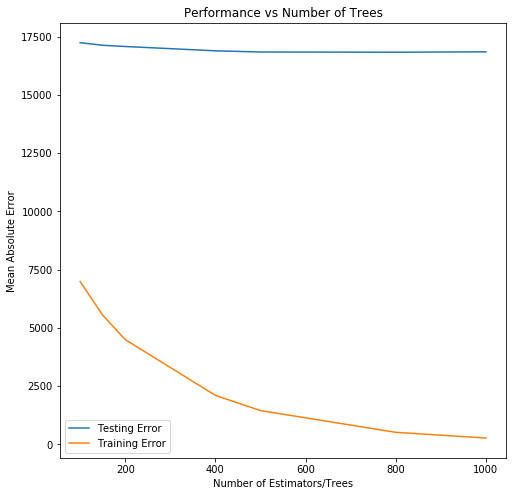

In [33]:
plt.figure(figsize=(8, 8))
plt.plot(grid_search_results['param_n_estimators'], -1*grid_search_results['mean_test_score'], label='Testing Error')
plt.plot(grid_search_results['param_n_estimators'], -1*grid_search_results['mean_train_score'], label='Training Error')
plt.xlabel('Number of Estimators/Trees')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Performance vs Number of Trees')
plt.show()

### Train model ###

The model will then be trained using the final tuned hyperparameters of the grid search cross validation.

In [34]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=800, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [35]:
predictions = model.predict(X_test)

# Evaluate Model #

The performance of the model is evaluated using the mean absolute error, mean square error and r2 score. `scikit-learn` provides us with functions to perform these evaluations.

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Absolute Error: {} \nMean Squared Error: {} \nR2 Score: {}'.format(mae, mse, r2))

Mean Absolute Error: 16015.465909499793 
Mean Squared Error: 711422791.1834084 
R2 Score: 0.8845256197712991


The plot below compares the predictions of the model with the corresponding ground-truth values.

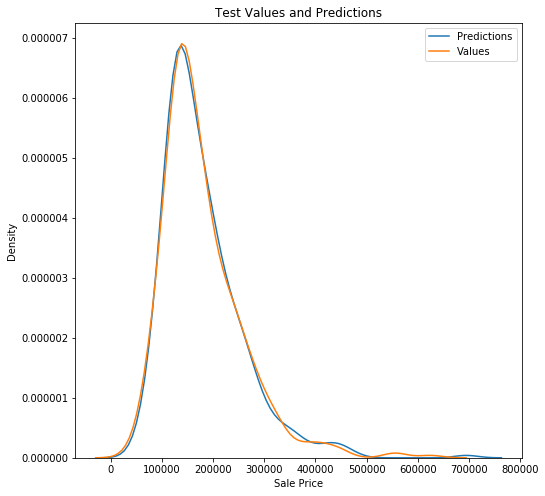

In [37]:
plt.figure(figsize=(8, 8))

# Density plot of the final predictions and the test values
sns.kdeplot(predictions, label='Predictions')
sns.kdeplot(y_test, label='Values')

# Label the plot
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Test Values and Predictions')
plt.show()

# Feature Importances #

We can take a look at the features that are most important in determining how well the model predicts sales prices. We will pick the top 20 features. This is also a way of scaling down the number of features from its bloated size. Only features that have significant impact in prediction will be used.

In [38]:
importance = model.feature_importances_
columns = list(features_columns)
importance_df = pd.DataFrame({'Features': columns, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
importance_top = importance_df.head(20)
importance_top

,Features,Importance
0,LotArea,0.070287
1,GrLivArea,0.058442
2,BsmtUnfSF,0.048608
3,GarageCarsPerGarageArea,0.046799
4,1stFlrSF,0.044800
5,BsmtFinSF1,0.041999
6,TotalBsmtSF,0.034309
7,2ndFlrSF,0.028716
8,MasVnrArea,0.028570
9,LotFrontage,0.028519


## Train new model feature importance ##

In [39]:
new_data = features_df[importance_top['Features']]
new_data.head(20)

,LotArea,GrLivArea,BsmtUnfSF,GarageCarsPerGarageArea,1stFlrSF,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,MasVnrArea,LotFrontage,MoSold,WoodDeckSF,GarageYrBlt,OverallQual,OpenPorchSF,YearRemodAdd,YearBuilt,OverallCond,YrSold,BedroomAbvGr
0,0.033420,0.259231,0.064212,1.293796,0.119780,0.125089,0.140098,0.413559,0.12250,0.207668,2,0.000000,2003.0,0.666667,0.111517,2003,2003,0.500,2008,0.375
1,0.038795,0.174830,0.121575,1.541304,0.212942,0.173281,0.206547,0.000000,0.00000,0.255591,5,0.347725,1976.0,0.555556,0.000000,1976,1976,0.875,2007,0.375
2,0.046507,0.273549,0.185788,1.166118,0.134465,0.086109,0.150573,0.419370,0.10125,0.217252,9,0.000000,2001.0,0.666667,0.076782,2002,2001,0.500,2008,0.375
3,0.038561,0.260550,0.231164,1.656542,0.143873,0.038271,0.123732,0.366102,0.00000,0.191693,2,0.000000,1998.0,0.666667,0.063985,1970,1915,0.500,2006,0.375
4,0.060576,0.351168,0.209760,1.272129,0.186095,0.116052,0.187398,0.509927,0.21875,0.268371,12,0.224037,2000.0,0.777778,0.153565,2000,2000,0.500,2008,0.500
5,0.059899,0.193670,0.027397,1.477083,0.106012,0.129695,0.130278,0.274092,0.00000,0.271565,10,0.046674,1993.0,0.444444,0.054845,1995,1993,0.500,2009,0.125
6,0.041057,0.256217,0.135702,1.114780,0.312070,0.242558,0.275941,0.000000,0.11625,0.239617,8,0.297550,2004.0,0.777778,0.104205,2005,2004,0.500,2007,0.375
7,0.042450,0.330821,0.092466,1.464876,0.177375,0.152197,0.181178,0.476029,0.15000,0.000000,11,0.274212,1973.0,0.666667,0.372943,1973,1973,0.625,2009,0.375
8,0.022529,0.271289,0.407534,1.514957,0.157871,0.000000,0.155810,0.364165,0.00000,0.162939,4,0.105018,1931.0,0.666667,0.000000,1950,1931,0.500,2008,0.250
9,0.028605,0.139977,0.059932,1.729268,0.170491,0.150780,0.162193,0.000000,0.00000,0.159744,1,0.000000,1939.0,0.444444,0.007313,1950,1939,0.625,2008,0.250


In [40]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 20 columns):
LotArea                    1452 non-null float64
GrLivArea                  1452 non-null float64
BsmtUnfSF                  1452 non-null float64
GarageCarsPerGarageArea    1452 non-null float64
1stFlrSF                   1452 non-null float64
BsmtFinSF1                 1452 non-null float64
TotalBsmtSF                1452 non-null float64
2ndFlrSF                   1452 non-null float64
MasVnrArea                 1452 non-null float64
LotFrontage                1452 non-null float64
MoSold                     1452 non-null int64
WoodDeckSF                 1452 non-null float64
GarageYrBlt                1371 non-null float64
OverallQual                1452 non-null float64
OpenPorchSF                1452 non-null float64
YearRemodAdd               1452 non-null int64
YearBuilt                  1452 non-null int64
OverallCond                1452 non-null float64
YrSold           

In [41]:
# Imputer on GarageYrBlt
new_features = imputer(new_data)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(new_features, targets, test_size=.3, random_state=random_state)

### Train model with results of GridSearchCV ###

In [42]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate new model #

In [43]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Absolute Error: {} \nMean Squared Error: {} \nR2 Score: {}'.format(mae, mse, r2))

Mean Absolute Error: 17445.798076629395 
Mean Squared Error: 805696834.310272 
R2 Score: 0.8692235563054663


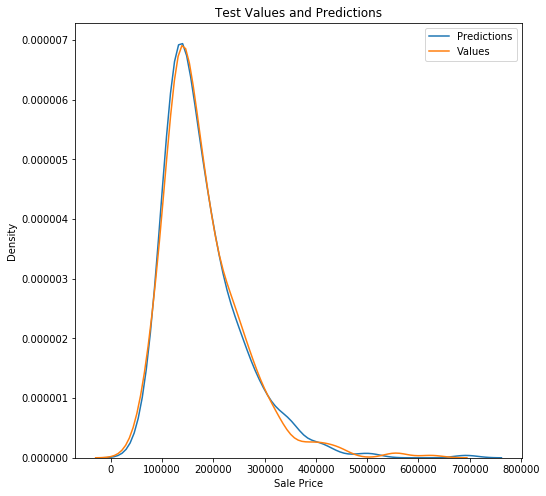

In [44]:
plt.figure(figsize=(8, 8))

# Density plot of the final predictions and the test values
sns.kdeplot(predictions, label='Predictions')
sns.kdeplot(y_test, label='Values')

# Label the plot
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Test Values and Predictions')
plt.show()

# Conclusion #

Having scaled down the features from nearly 300 to just 20 features, we can see that the model's strength of prediction is not far of its prediction strength when all the features are being used. This can be see as a more optimal model. 

Techniques for building models for this problem vary. Machine Learning is an experiemental process and the model can be further optimized to give better results.